In [1]:
%%R
!source("c:\\Users\\Digvi\\Documents\\assignment\\cann_assessment\\run_azimuth.R")

UsageError: Cell magic `%%R` not found.


Available metadata columns: Index(['annotation', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'nCount_RNA', 'nFeature_RNA',
       'predicted.class.score', 'predicted.class', 'predicted.cluster.score',
       'predicted.cluster', 'predicted.subclass.score', 'predicted.subclass',
       'predicted.cross_species_cluster.score',
       'predicted.cross_species_cluster', 'mapping.score'],
      dtype='object')
predicted.class
Glutamatergic    20874
Non-Neuronal     12656
GABAergic         5216
Name: count, dtype: int64


C:\Users\Digvi\AppData\Local\Temp\ipykernel_14860\2589089626.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cell_counts.index, y=cell_counts.values, palette="viridis")


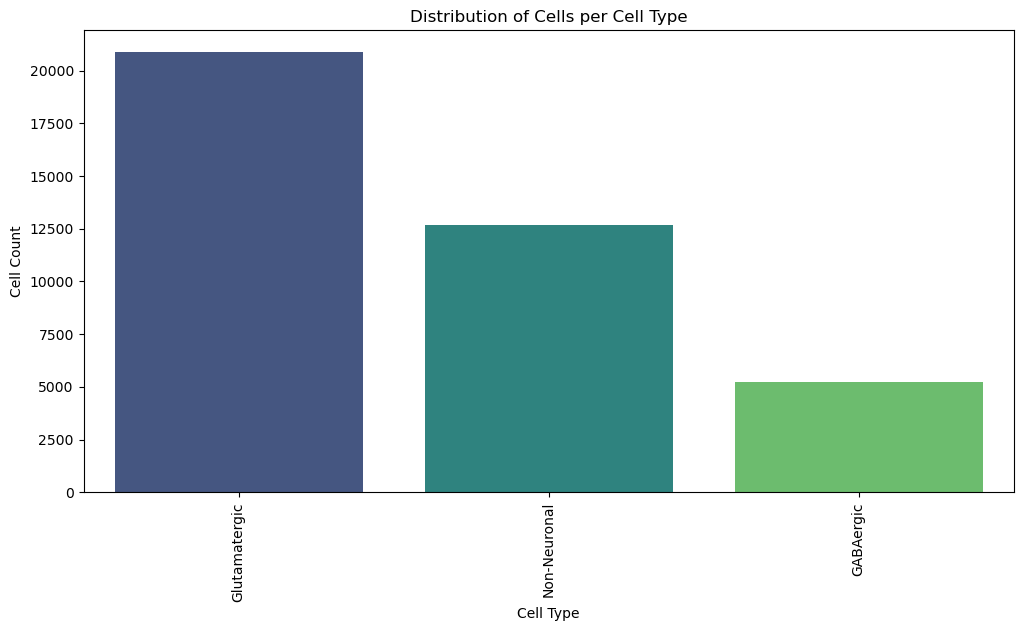

In [2]:
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the annotated data
adata = ad.read_h5ad("C:\\Users\\Digvi\\Documents\\assignment\\cann_assessment\\annotated_Mouse_brain.h5ad")

# Check available columns
print("Available metadata columns:", adata.obs.columns)

# Select the correct column for cell type
cell_type_col = None
for col in ["predicted.celltype", "predicted.class", "predicted.subclass"]:
    if col in adata.obs.columns:
        cell_type_col = col
        break

if cell_type_col is None:
    raise ValueError("No predicted cell type column found in metadata.")

# Compute the number of cells per cell type
cell_counts = adata.obs[cell_type_col].value_counts()

# Print cell counts
print(cell_counts)

# Visualize distribution using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=cell_counts.index, y=cell_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Cell Type")
plt.ylabel("Cell Count")
plt.title("Distribution of Cells per Cell Type")
plt.show()
